In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_taxi = pd.read_parquet("/content/drive/MyDrive/taxi_data_cleaned.parquet.gzip") # loading cleaned verion 1 file

In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36591882 entries, 0 to 36591881
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float32       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float32       
 11  extra                  float32       
 12  mta_tax                float32       
 13  tip_amount             float32       
 14  tolls_amount           float32       
 15  improvement_surcharge  float32       
 16  total_amount           float32       
 17  congestion_surcharge   float32       
 18  airport_fee         

In [ ]:
# Function to convert the object type columns to categorical values to reduce the space
def conv_catg(dataframe):
    for col in ['VendorID','passenger_count','store_and_fwd_flag','RatecodeID','payment_type','PULocationID','DOLocationID','pickup_day','dropoff_day','pickup_hour','dropoff_hour','pickup_month','dropoff_month','pickup_mday','dropoff_mday','time_of_day_pickup','time_of_day_dropoff']:
        dataframe[col] = dataframe[col].astype('category')

In [ ]:
conv_catg(df_taxi)

In [ ]:
# Code to reduce the size of the dataframe to make efficient use of RAM
# Code obtained from: https://towardsdatascience.com/how-to-work-with-million-row-datasets-like-a-pro-76fb5c381cdd
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [ ]:
df_taxi = reduce_memory_usage(df_taxi)

Mem. usage decreased to 2024.04 Mb (27.5% reduction)


In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36591882 entries, 0 to 36591881
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        category      
 4   trip_distance          float16       
 5   RatecodeID             category      
 6   store_and_fwd_flag     category      
 7   PULocationID           category      
 8   DOLocationID           category      
 9   payment_type           category      
 10  fare_amount            float16       
 11  extra                  float16       
 12  mta_tax                float16       
 13  tip_amount             float16       
 14  tolls_amount           float16       
 15  improvement_surcharge  float16       
 16  total_amount           float16       
 17  congestion_surcharge   float16       
 18  airport_fee         

In [ ]:
df_taxi.describe()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,speed
count,3.659188e+07,3.659188e+07,3.659188e+07,36591882.0,3.659188e+07,36591882.00,3.659188e+07,3.659188e+07,36591882.00,36591882.0,3.659188e+07
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,NaN,0.00,NaN,0.000000e+00
min,9.997559e-02,1.000214e-02,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,3.100586e-01,0.00,60.0,1.008606e-02
25%,1.139648e+00,7.000000e+00,0.000000e+00,0.5,1.000000e+00,0.00,3.000488e-01,1.229688e+01,2.50,454.0,7.796875e+00
50%,1.900391e+00,1.000000e+01,5.000000e-01,0.5,2.160156e+00,0.00,3.000488e-01,1.596094e+01,2.50,737.0,1.030469e+01
75%,3.539062e+00,1.600000e+01,2.500000e+00,0.5,3.359375e+00,0.00,3.000488e-01,2.256250e+01,2.50,1187.0,1.412500e+01
max,3.802500e+02,1.777000e+03,1.479688e+01,0.5,1.975000e+02,214.25,1.000000e+00,1.784000e+03,2.75,42432.0,6.500000e+01


In [ ]:
df_taxi.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_day               0
dropoff_day              0
pickup_hour              0
dropoff_hour             0
pickup_month             0
dropoff_month            0
pickup_mday              0
dropoff_mday             0
time_of_day_pickup       0
time_of_day_dropoff      0
duration                 0
speed                    0
dtype: int64

### Univariate Analysis

In [ ]:
# Function to plot the countplot of categorical variables with percentage or 
# the frequency of each type persent in that variable.
 

def barplt(data,cl1,prec=False,n=None):
    total=len(data[cl1])
    count=data[cl1].nunique()
    
    if n is None:
        plt.figure(figsize=(count+1,5))
    else:
        plt.figure(figsize=(n+1,5))
    
    plt.xticks(rotation=90,fontsize=15)
    pt=sns.countplot(data=data,x=cl1,palette='Paired',order=data[cl1].value_counts().index[:n].sort_values())
    
    for p in pt.patches:
        if prec==True:
            label='{:.1f}%'.format(100*p.get_height()/total)
        else:
            label=p.get_height()
        
        x=p.get_x()+p.get_width()/2
        y=p.get_height()
        
        pt.annotate(label,(x,y),ha='center',va='center',size=12,xytext=(0,5),textcoords='offset points')
    
    plt.show()

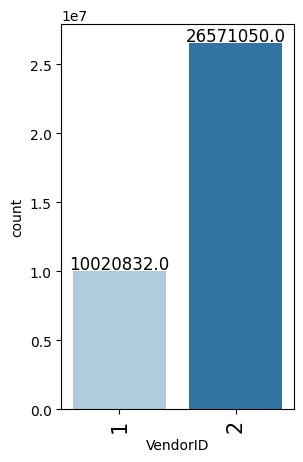

In [ ]:
barplt(df_taxi,'VendorID')

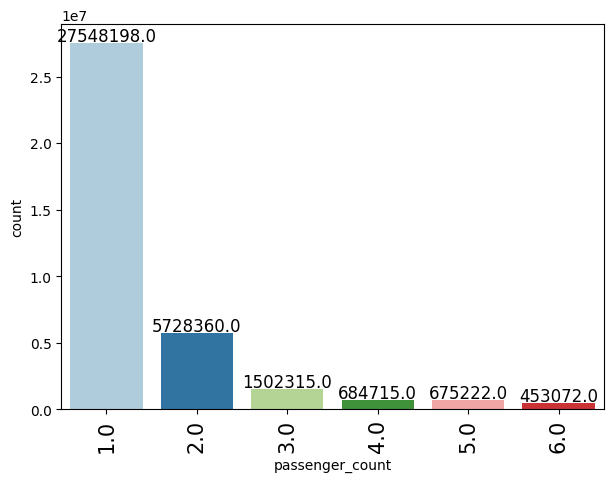

In [ ]:
barplt(df_taxi,'passenger_count')

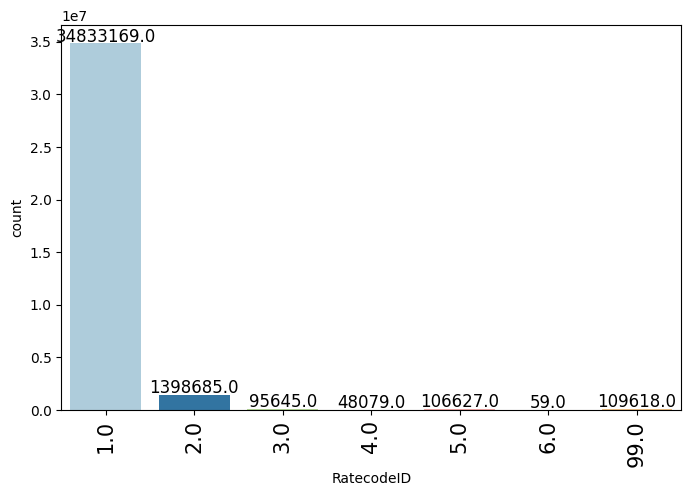

In [ ]:
barplt(df_taxi,'RatecodeID')



*   Accroding to the description of the taxi_dataset there is no RateCodeID 99.0. So, the rows with ratecode 99 have to be further analysed.



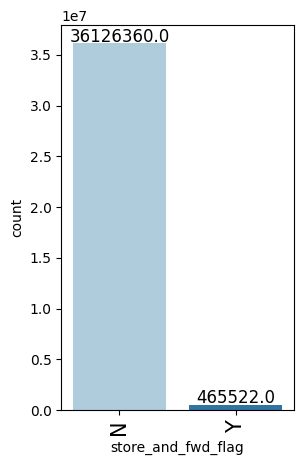

In [ ]:
barplt(df_taxi,'store_and_fwd_flag')

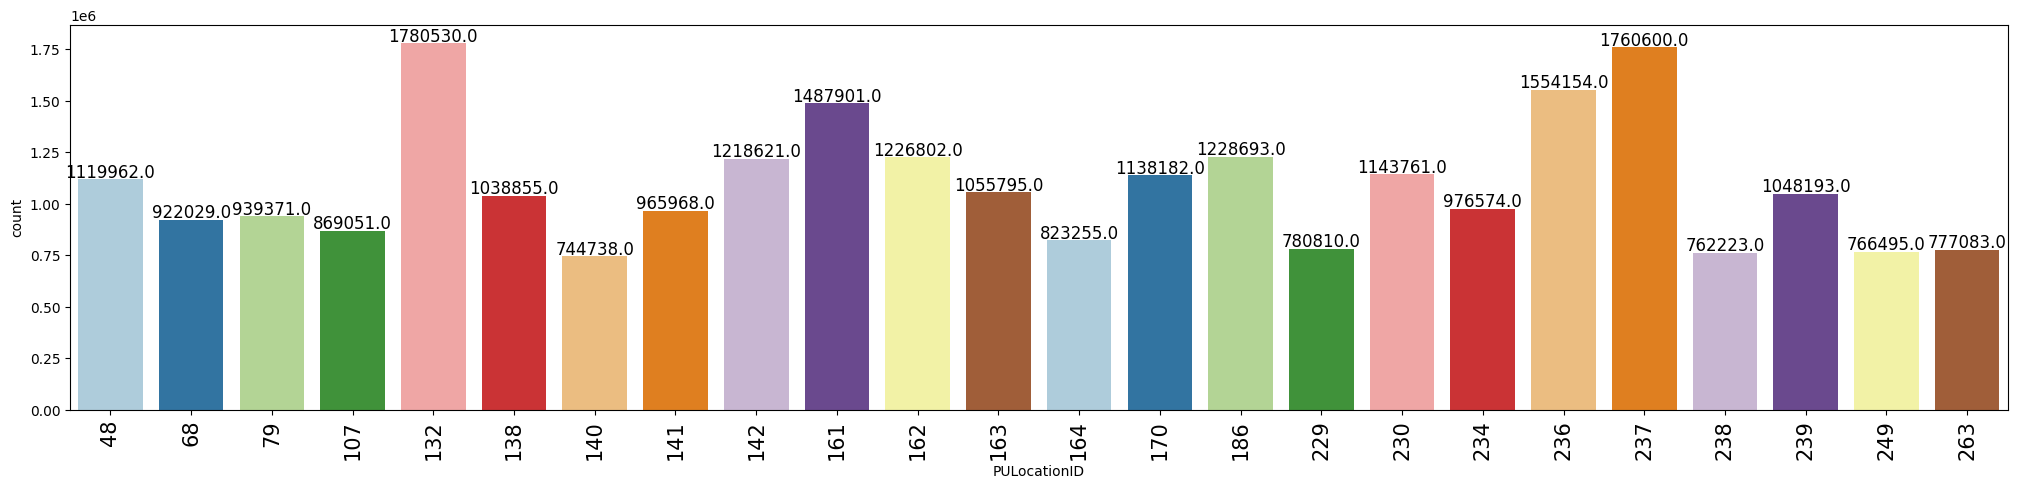

In [ ]:
barplt(df_taxi,'PULocationID',n=24)

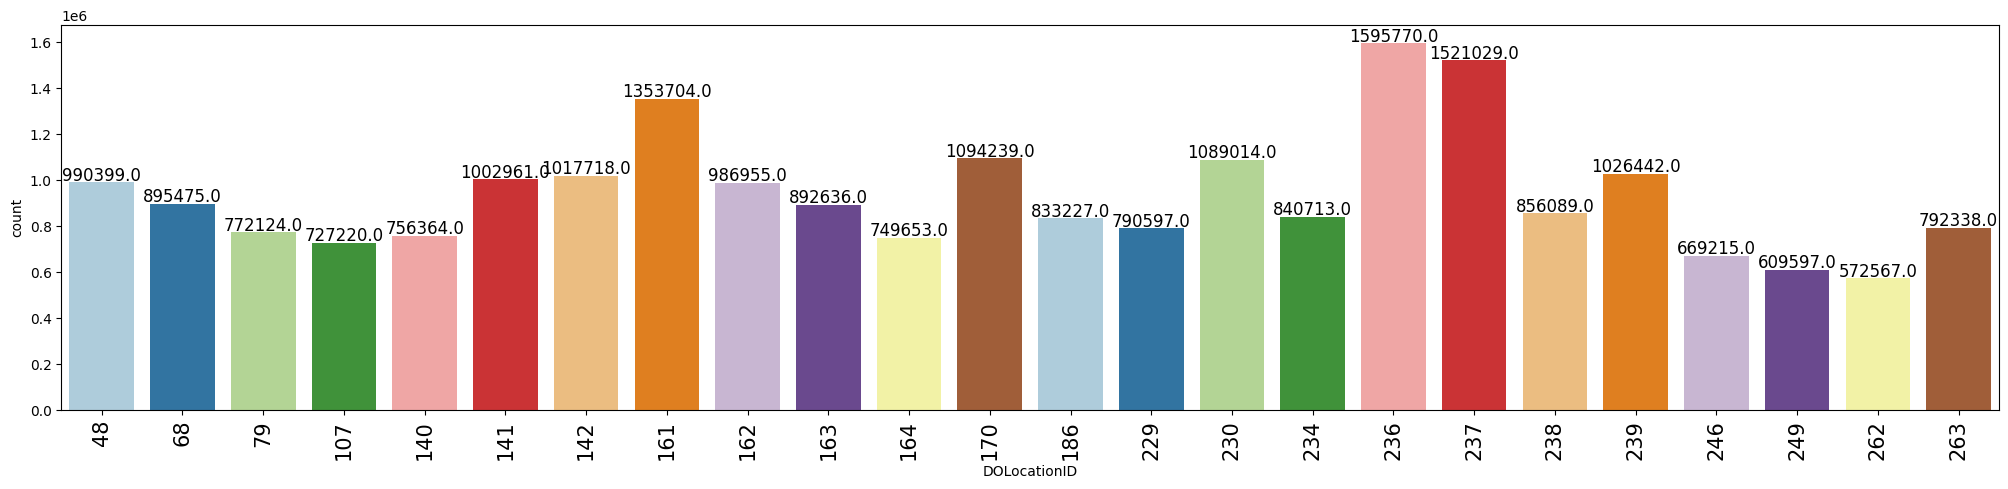

In [ ]:
barplt(df_taxi,'DOLocationID',n=24)

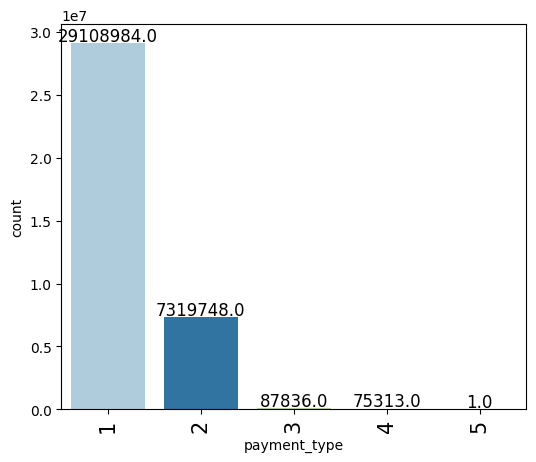

In [ ]:
barplt(df_taxi,'payment_type')

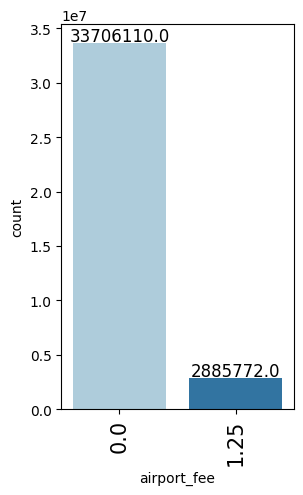

In [ ]:
barplt(df_taxi,'airport_fee')

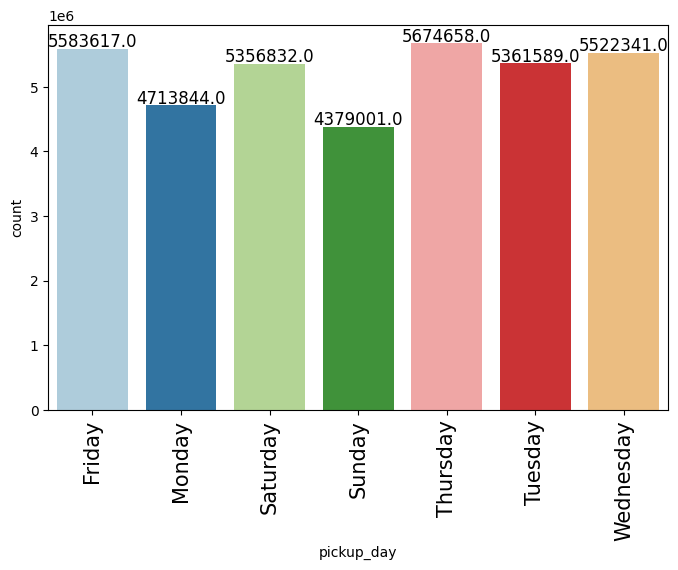

In [ ]:
barplt(df_taxi,'pickup_day')

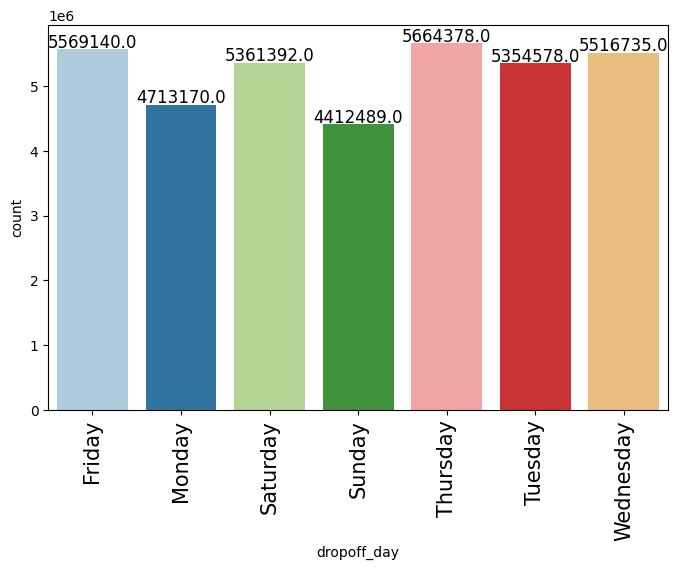

In [ ]:
barplt(df_taxi,'dropoff_day')

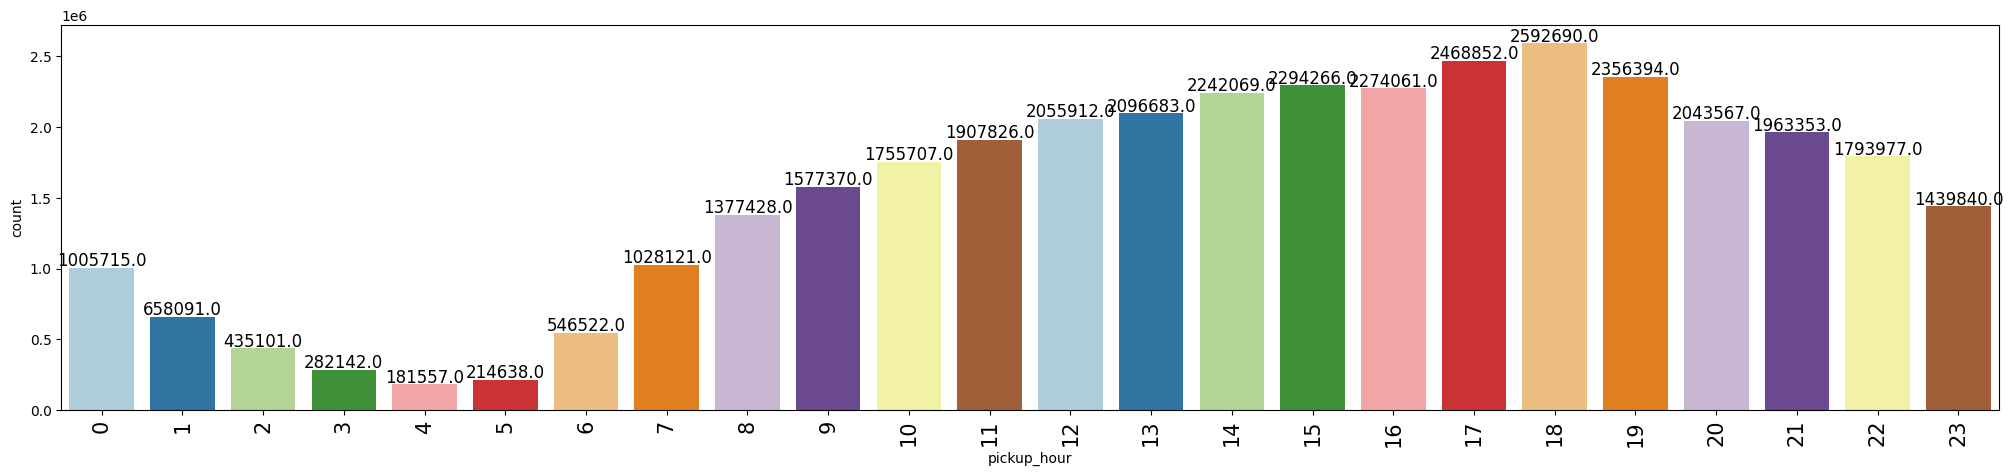

In [ ]:
barplt(df_taxi,'pickup_hour')

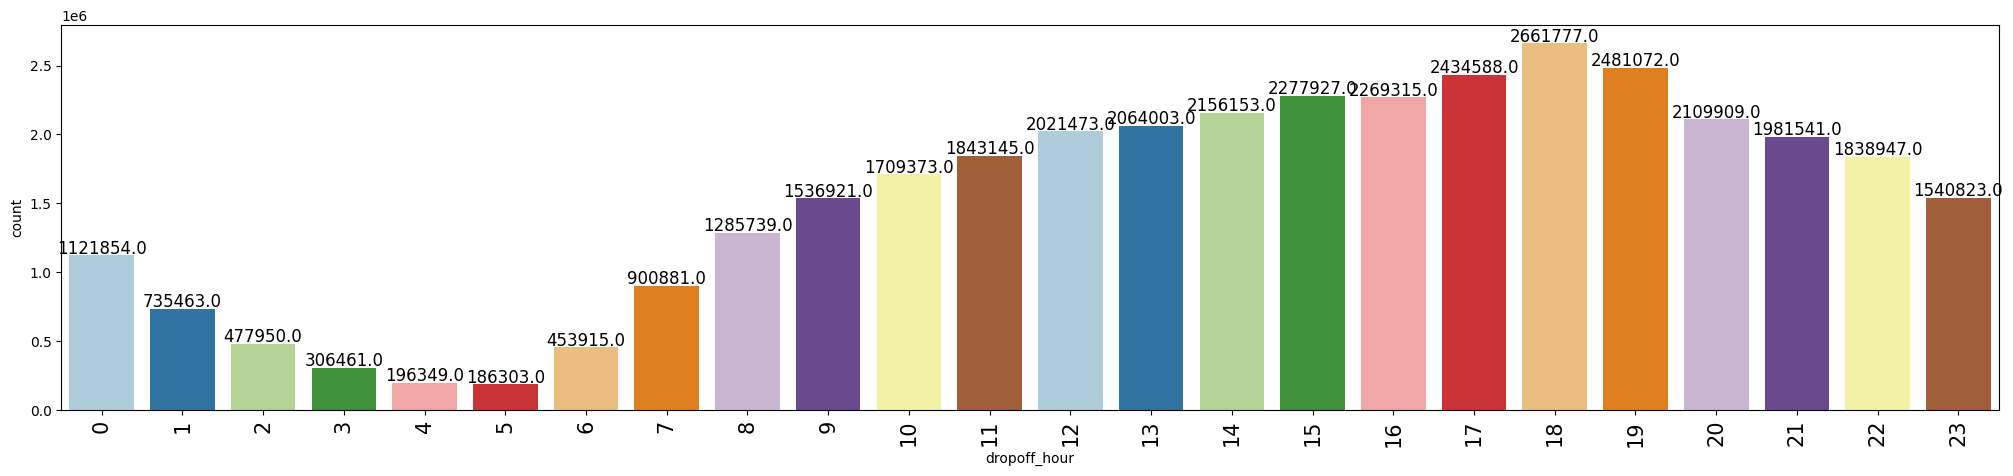

In [ ]:
barplt(df_taxi,'dropoff_hour')

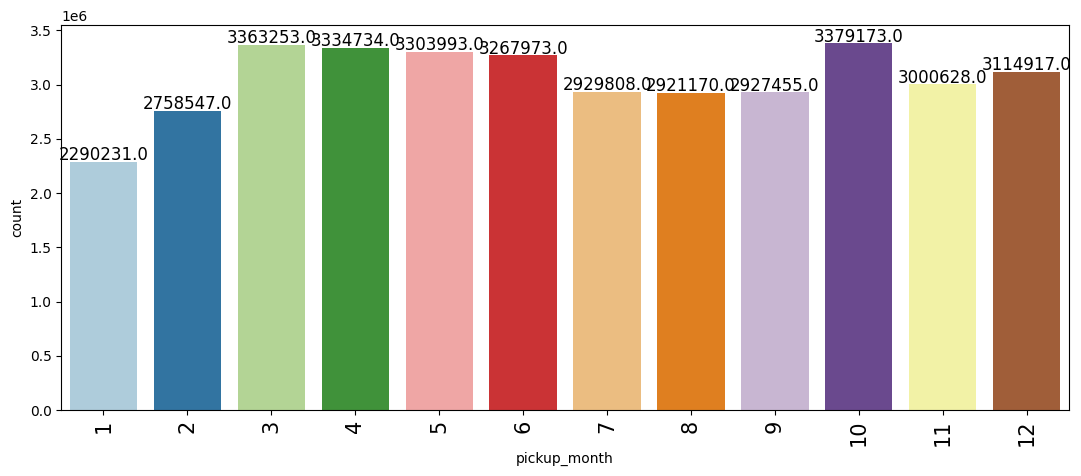

In [ ]:
barplt(df_taxi,'pickup_month')

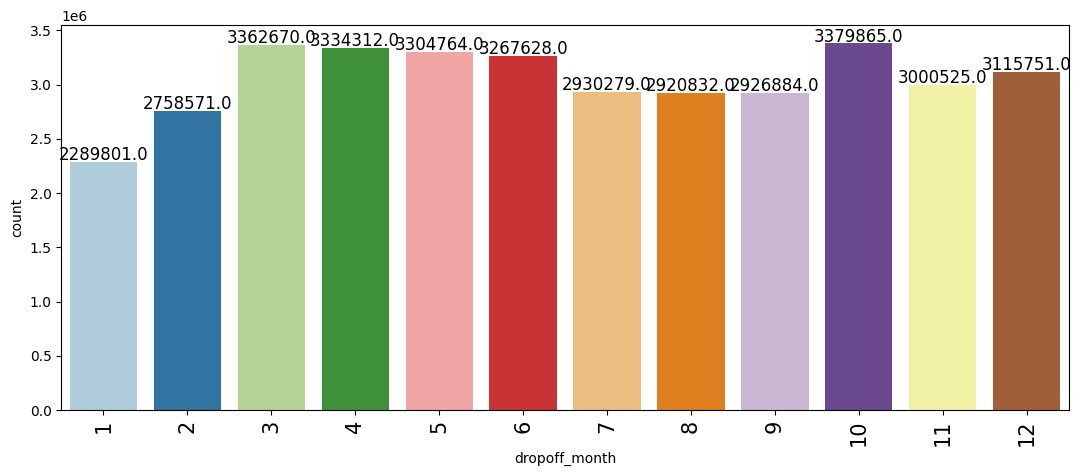

In [ ]:
barplt(df_taxi,'dropoff_month')

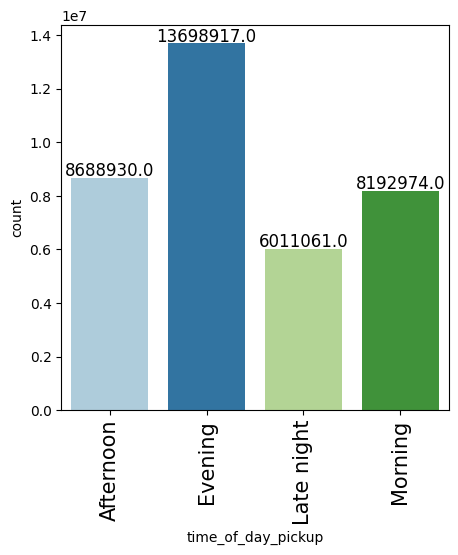

In [ ]:
barplt(df_taxi,'time_of_day_pickup')

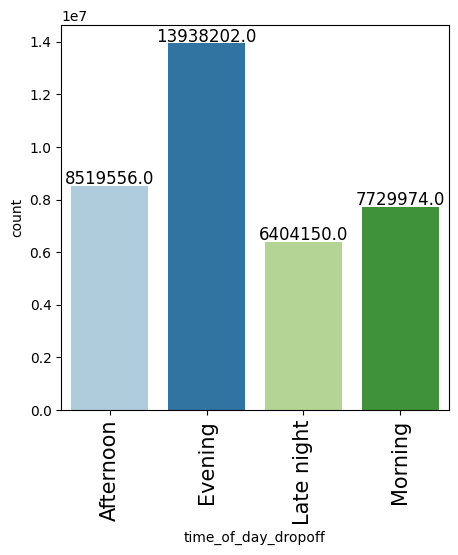

In [ ]:
barplt(df_taxi,'time_of_day_dropoff')

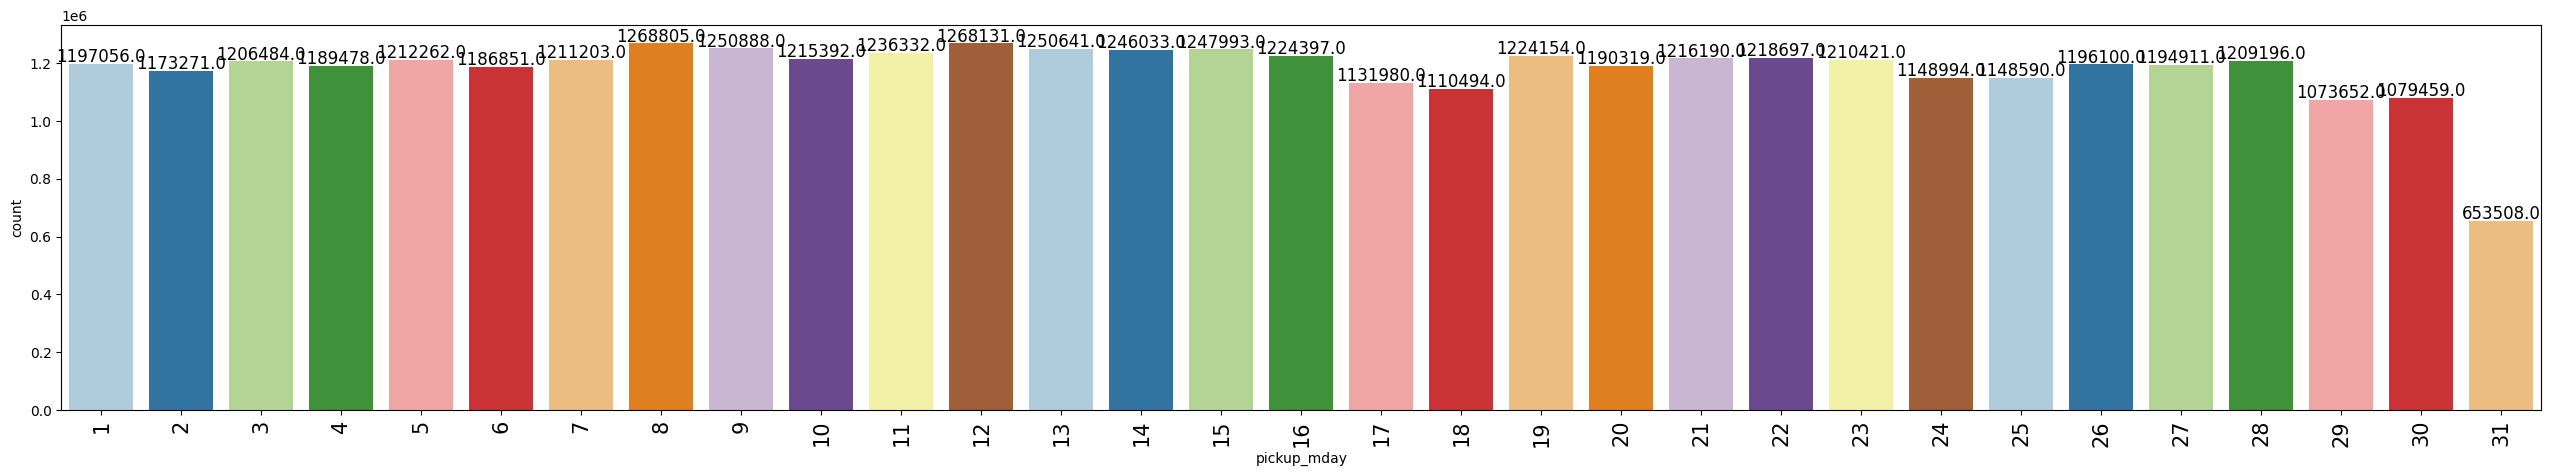

In [ ]:
barplt(df_taxi,'pickup_mday')

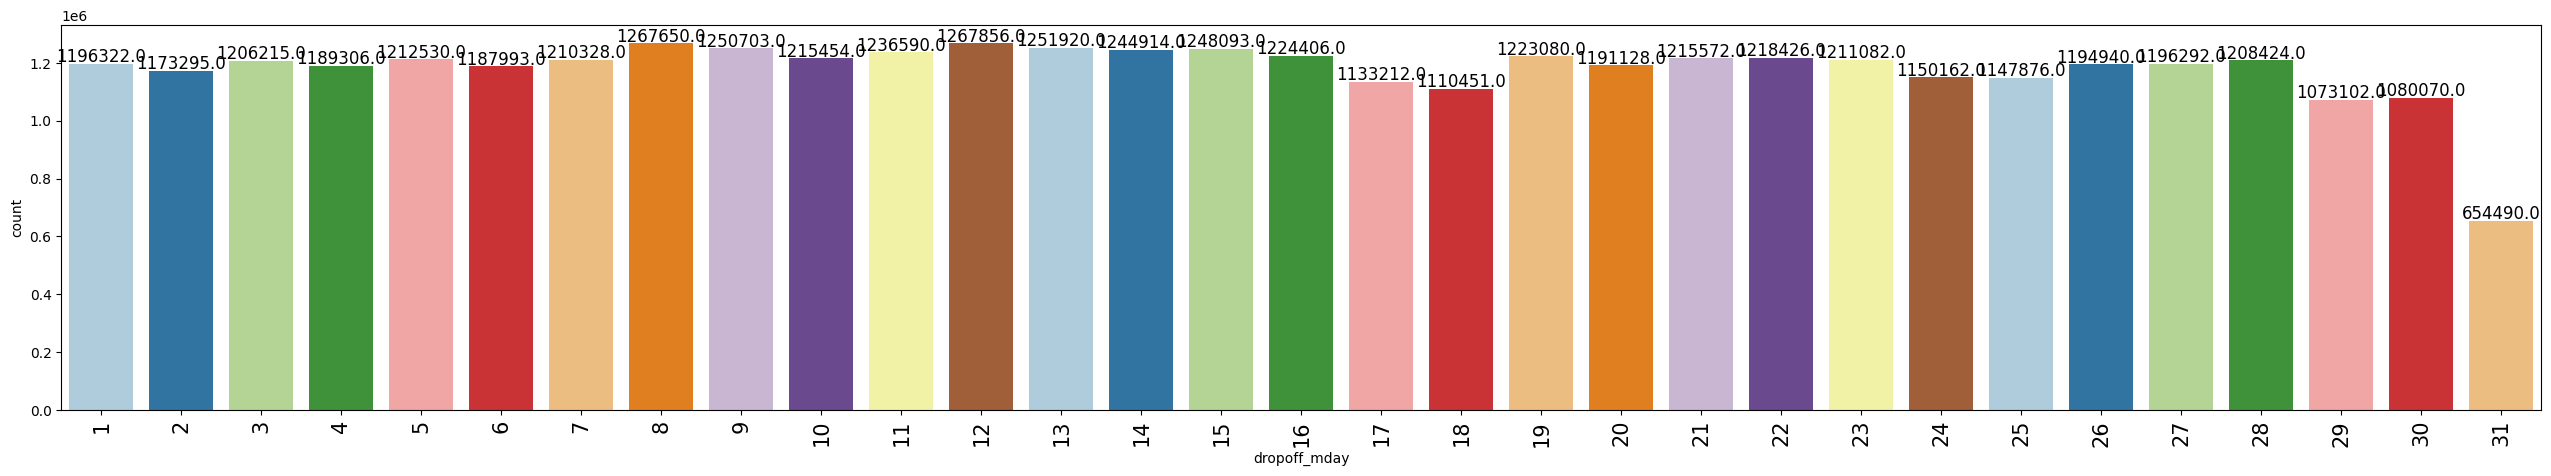

In [ ]:
barplt(df_taxi,'dropoff_mday')

### Univariate analysis of continous data and Data cleaning

In [ ]:
def hiplt(data,col,kde=False):
    fig,axs=plt.subplots(nrows=2,ncols=1,sharex=True,gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=(12,7))
    sns.boxplot(data=data,x=col,ax=axs[0],showmeans=True)
    sns.histplot(data=data,x=col,stat='density',kde=kde,element='step',ax=axs[1])
    axs[1].axvline(data[col].mean(),color='green',linestyle='--')
    axs[1].axvline(data[col].median(),color='black',linestyle='-')
    plt.show()

/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


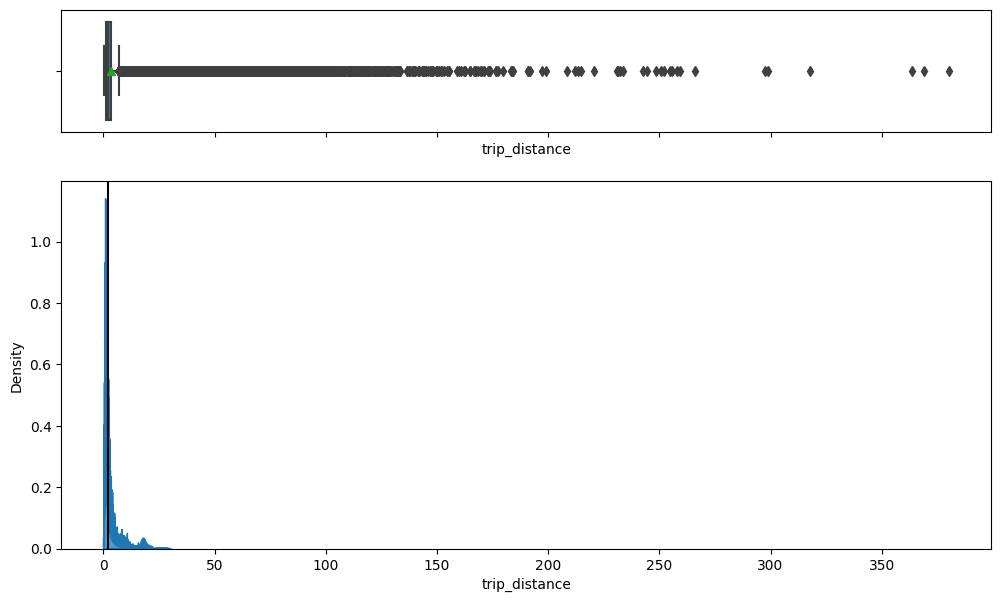

In [ ]:
hiplt(df_taxi,'trip_distance')



*   The distribution of the trip_distance is heavily right skewed, so tranformation of the data is necessary.



/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


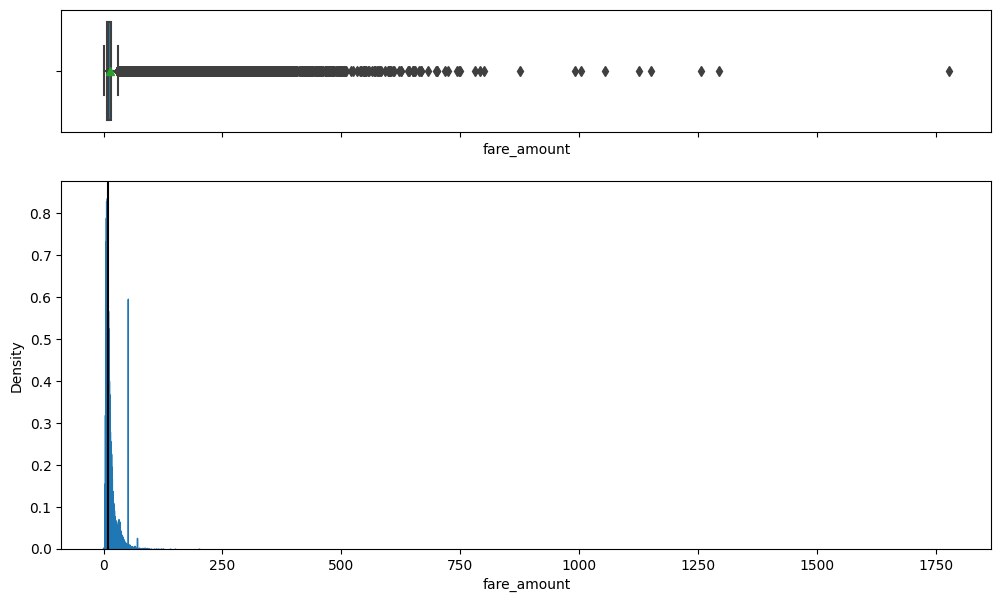

In [ ]:
hiplt(df_taxi,'fare_amount')



*  The fare amount is only heavily skewed, so it also needs some transformation.
* Since fare_amount is the amount before adding all the overhead expenses, it would be better to drop the fare amount and keep the total amount.



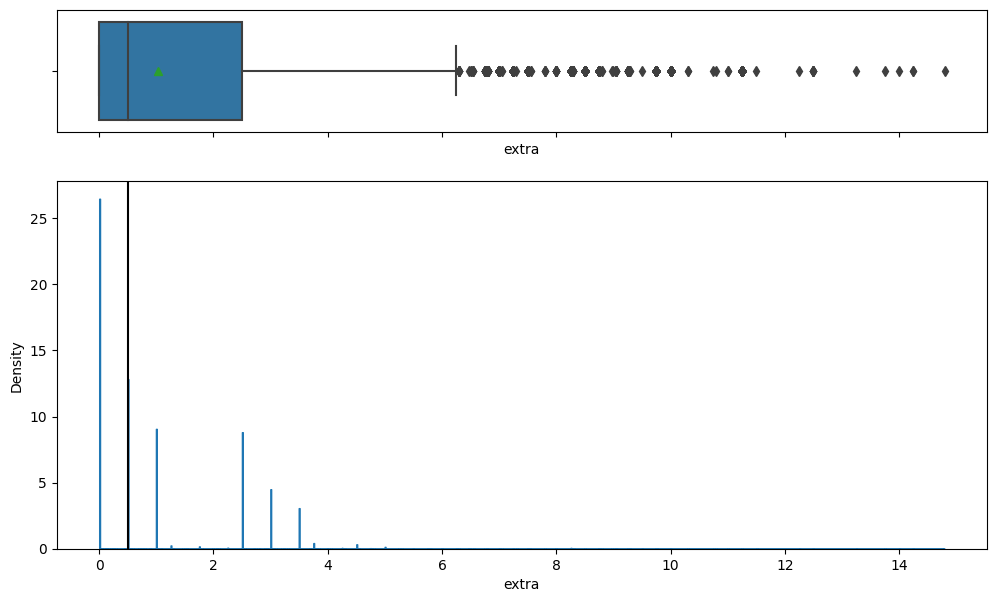

In [ ]:
hiplt(df_taxi,'extra')

* There is no particular distribution assoiciated, but this represents the rush hour and overhead charges.

In [ ]:
extra_vals = df_taxi['extra'].value_counts()

In [ ]:
l = []
for i in range(len(extra_vals.index)):
  if extra_vals.values[i] < 10000:
    l.append(extra_vals.index[i])
print(l)

[5.75, 4.0, 3.25, 3.30078125, 5.0, 2.0, 5.5, 4.30078125, 3.80078125, 6.0, 2.75, 1.5, 6.80078125, 2.05078125, 0.2900390625, 7.5, 8.296875, 5.30078125, 5.25, 1.7998046875, 5.80078125, 9.046875, 0.52001953125, 4.55078125, 6.30078125, 0.0200042724609375, 0.509765625, 1.01953125, 1.2998046875, 7.80078125, 6.55078125, 1.0302734375, 4.80078125, 0.07000732421875, 0.52978515625, 0.05999755859375, 6.25, 0.04998779296875, 0.029998779296875, 0.5400390625, 1.009765625, 0.01000213623046875, 2.55078125, 7.05078125, 6.5, 8.796875, 0.09002685546875, 7.55078125, 3.05078125, 14.25, 10.296875, 12.5, 0.08001708984375, 14.796875, 2.900390625, 10.796875, 1.08984375, 0.040008544921875, 1.0595703125, 8.0, 0.89990234375, 7.30078125, 0.60009765625, 3.69921875, 0.2099609375, 0.1800537109375, 9.0, 0.239990234375, 1.0400390625, 9.5, 3.849609375, 13.75, 0.0999755859375, 11.5, 14.0, 13.25, 0.75, 2.099609375, 6.75, 3.19921875, 10.75, 0.5498046875, 0.1300048828125, 0.1500244140625, 3.099609375]


In [ ]:
df_taxi.drop(index = df_taxi[df_taxi['extra'].isin(l)].index, inplace=True) # dropping rows with unnecessary extra values

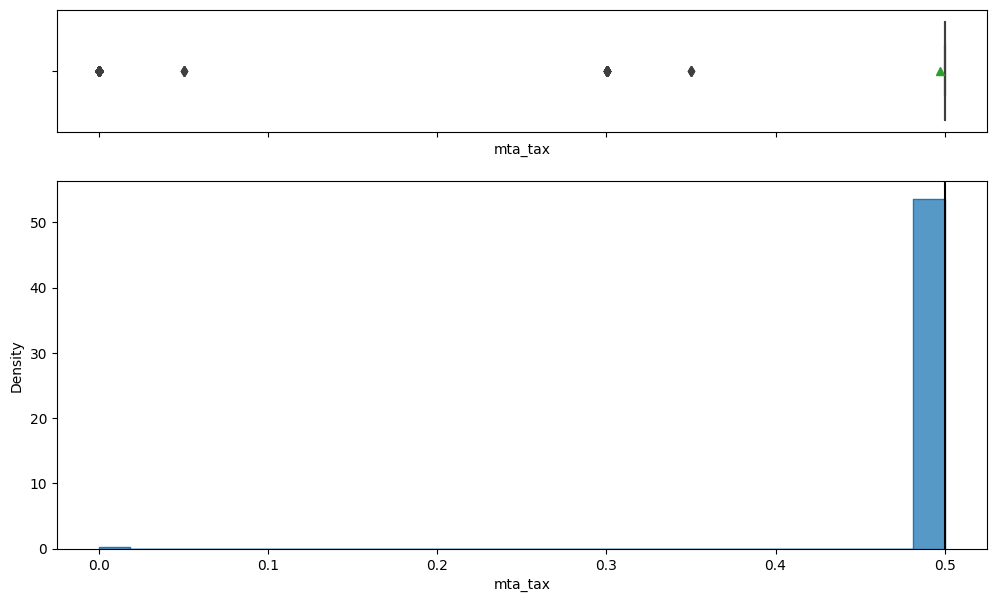

In [ ]:
hiplt(df_taxi,'mta_tax')

* MTA tax is automatically triggered based on metered rate in use, so it will mostly be the same for all the data points. So this column can be dropped.

In [ ]:
df_taxi['mta_tax'].value_counts()

0.500000    36387058
0.000000      203906
0.300049          36
0.049988           4
0.350098           3
Name: mta_tax, dtype: int64

/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


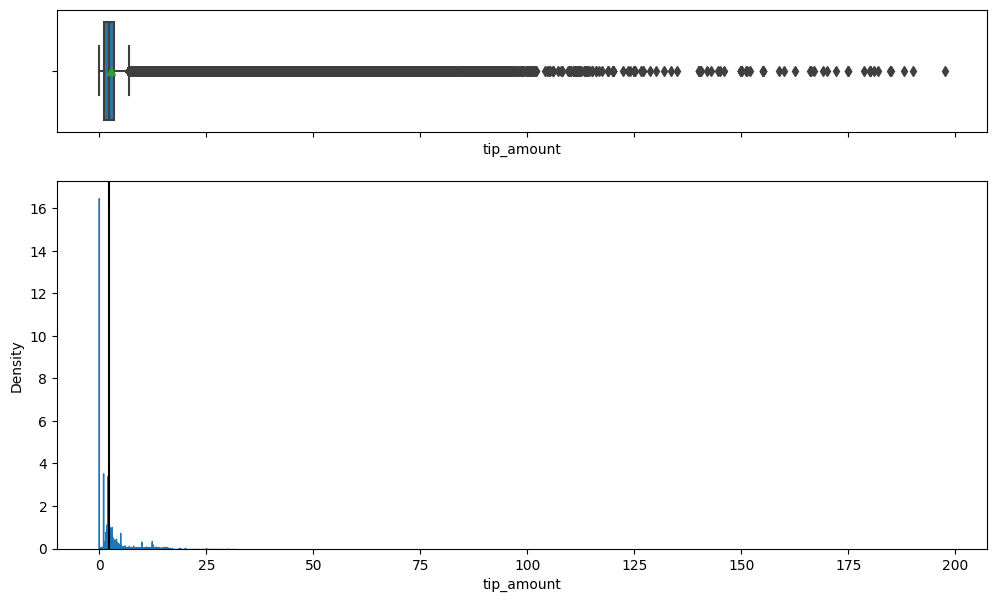

In [ ]:
hiplt(df_taxi,'tip_amount')



*   Tip amount is also skewed, so needs some transformation.



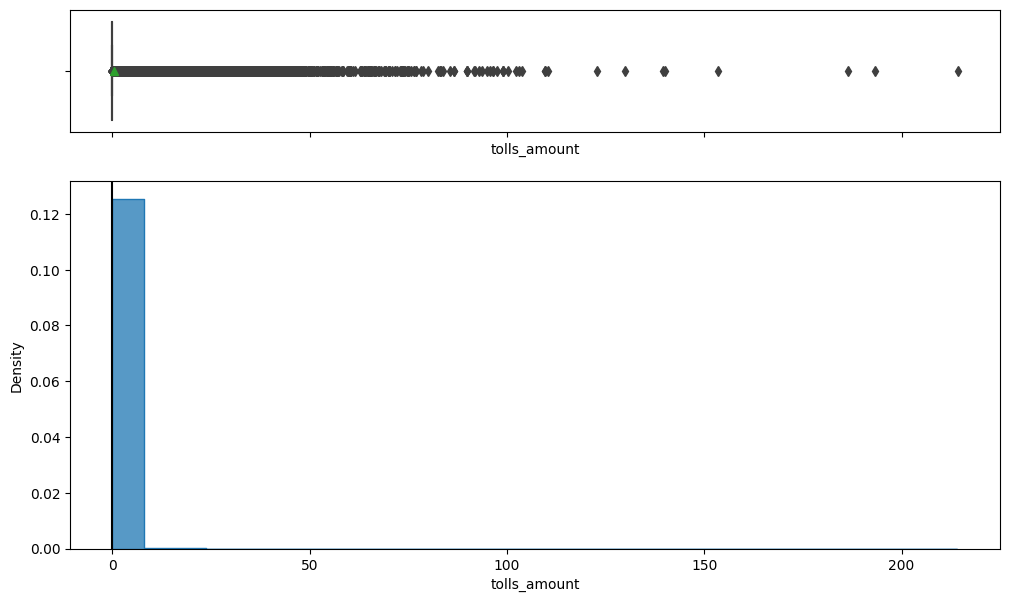

In [ ]:
hiplt(df_taxi,'tolls_amount')

* More than 75 percentile of the data are located at 0 as we can see from the box plot. And it is also skewed.

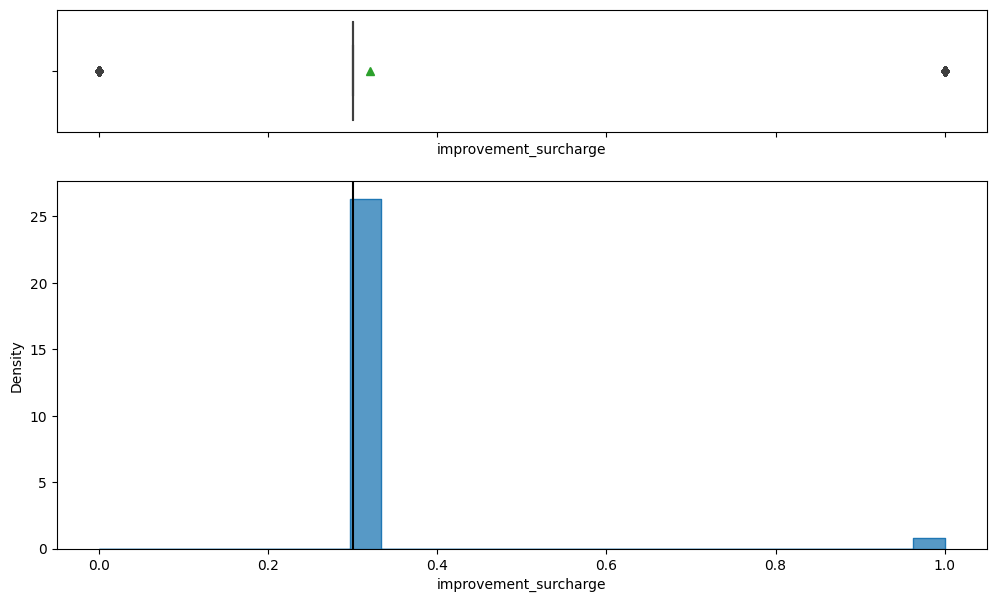

In [ ]:
hiplt(df_taxi,'improvement_surcharge')

* From 2015 all the trips have an improvement surcharge of $0.3 according to the description. Since all the trips will have the same data, this column can be dropped for further analysis.

In [ ]:
df_taxi['improvement_surcharge'].value_counts()

0.300049    35512467
1.000000     1076108
0.000000        2432
Name: improvement_surcharge, dtype: int64

In [ ]:
df_taxi.drop(index = df_taxi[(df_taxi['improvement_surcharge']==0) | (df_taxi['improvement_surcharge']==1)].index,inplace=True) # droppping rows with improvement surcharge not equal to 0.3

/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


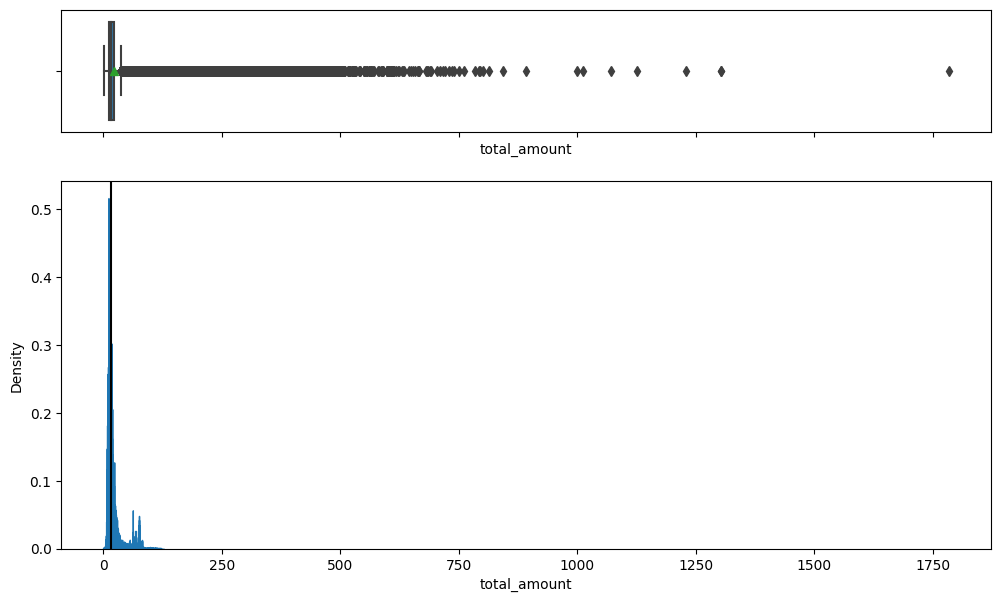

In [ ]:
hiplt(df_taxi,'total_amount')

* Total fare is also skewed, which needs transformation

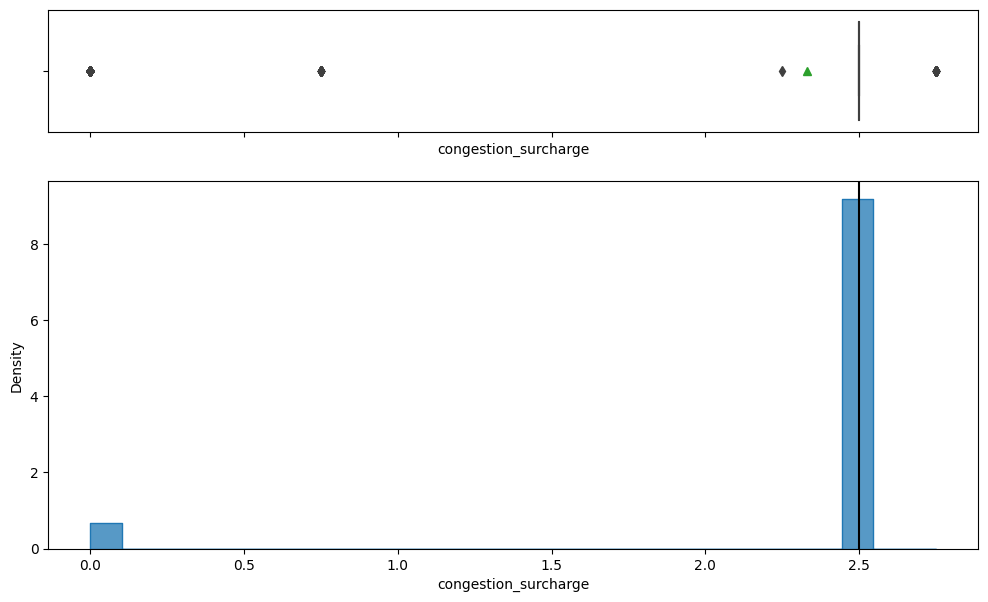

In [ ]:
hiplt(df_taxi,'congestion_surcharge')

* For most of the trips if congestion surcharge is applied then the charge is $ 2.5. This has to be further examined if this column is necessary.

In [ ]:
df_taxi['congestion_surcharge'].value_counts()

2.50    33134026
0.00     2378354
2.75          50
0.75          36
2.25           1
Name: congestion_surcharge, dtype: int64

In [ ]:
df_taxi.drop(index = df_taxi[(df_taxi['congestion_surcharge']==2.75) | (df_taxi['congestion_surcharge']==0.75) | (df_taxi['congestion_surcharge']==2.25)].index,inplace=True) # dropping rows where congestion surcharge not equal to 2.5 or 0

/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


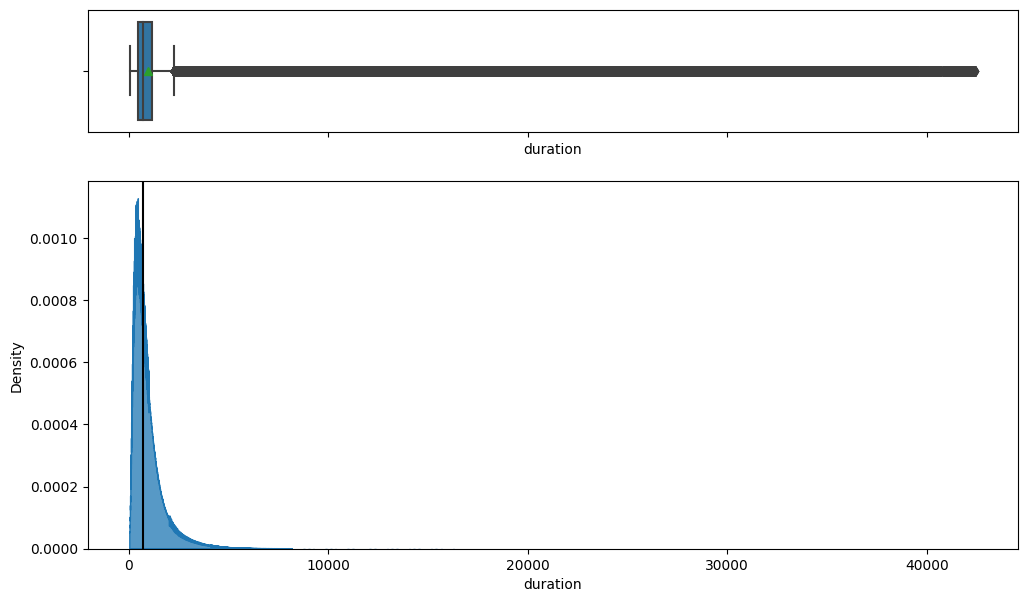

In [ ]:
hiplt(df_taxi,'duration')

* The duration is represented in seconds and is also skewed. 

/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


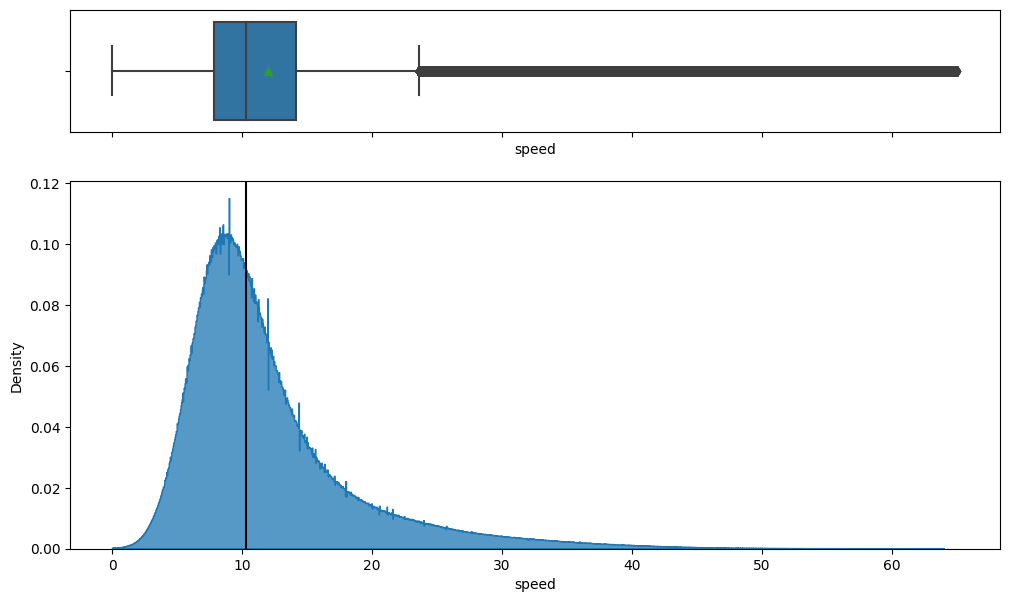

In [ ]:
hiplt(df_taxi,'speed')

* The average speed is about 10 mph.
* Most of the avgerage speeds are within 30 mph.

### Bivariate Analysis

<Axes: xlabel='trip_distance', ylabel='total_amount'>

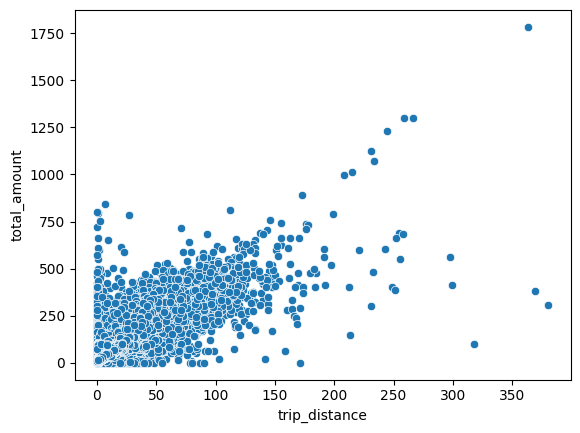

In [ ]:
sns.scatterplot(data=df_taxi,x='trip_distance',y='total_amount')

<Axes: xlabel='duration', ylabel='total_amount'>

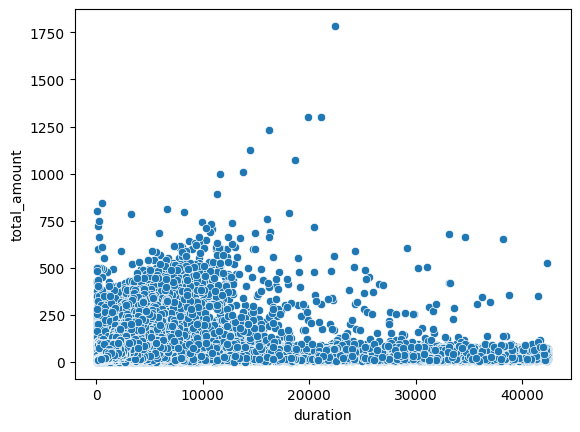

In [ ]:
sns.scatterplot(data=df_taxi,x='duration',y='total_amount')

<Axes: xlabel='speed', ylabel='total_amount'>

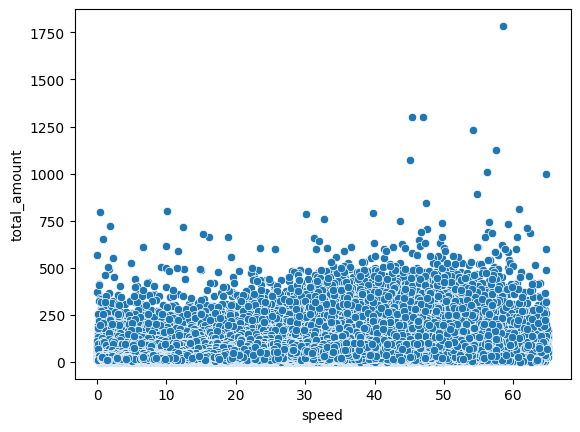

In [ ]:
sns.scatterplot(data=df_taxi,x='speed',y='total_amount')

### Data Cleaning and dropping unecessary columns

In [ ]:
df_taxi[(df_taxi['duration']>3600) & (df_taxi['total_amount']<10)][['trip_distance','duration','total_amount','speed']]

,trip_distance,duration,total_amount,speed
52561,1.230469,33056.0,9.046875,0.133911
160589,9.203125,11240.0,0.310059,2.945312
190447,1.379883,4016.0,8.796875,1.236328
217734,2.179688,10144.0,9.796875,0.773438
284303,1.370117,37312.0,9.796875,0.132080
...,...,...,...,...
36425938,55.093750,12896.0,1.009766,15.382812
36431088,0.540039,20784.0,9.101562,0.093506
36444271,0.819824,5352.0,9.796875,0.551758
36514181,1.169922,26080.0,9.000000,0.161499


In [ ]:
df_taxi.drop(index=df_taxi[(df_taxi['duration']>3600) & (df_taxi['total_amount']<10)].index,inplace=True)

In [ ]:
df_taxi[df_taxi['speed']<0.5][['trip_distance','duration','total_amount','speed']]

,trip_distance,duration,total_amount,speed
27370,3.529297,37632.0,20.468750,0.337646
33542,1.709961,29760.0,13.562500,0.206787
41639,1.709961,22880.0,14.156250,0.269043
42440,1.000000,24128.0,12.296875,0.149170
53269,1.070312,10288.0,11.757812,0.374268
...,...,...,...,...
35382436,0.099976,866.0,15.351562,0.415771
35390863,1.250000,14776.0,15.796875,0.304688
35396276,0.099976,751.0,11.796875,0.479248
35433641,1.419922,37248.0,10.296875,0.137329


In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['speed']<0.5].index,inplace=True)

In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35504056 entries, 0 to 36591784
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        category      
 4   trip_distance          float16       
 5   RatecodeID             category      
 6   store_and_fwd_flag     category      
 7   PULocationID           category      
 8   DOLocationID           category      
 9   payment_type           category      
 10  fare_amount            float16       
 11  extra                  float16       
 12  mta_tax                float16       
 13  tip_amount             float16       
 14  tolls_amount           float16       
 15  improvement_surcharge  float16       
 16  total_amount           float16       
 17  congestion_surcharge   float16       
 18  airport_fee         

In [ ]:
df_taxi.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','fare_amount','mta_tax'],axis=1,inplace=True) # dropping unnecessary columns

In [ ]:
df_taxi['airport_fee'] = df_taxi['airport_fee'].astype('float16')

In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35504056 entries, 0 to 36591784
Data columns (total 27 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   VendorID               category
 1   passenger_count        category
 2   trip_distance          float16 
 3   RatecodeID             category
 4   store_and_fwd_flag     category
 5   PULocationID           category
 6   DOLocationID           category
 7   payment_type           category
 8   extra                  float16 
 9   tip_amount             float16 
 10  tolls_amount           float16 
 11  improvement_surcharge  float16 
 12  total_amount           float16 
 13  congestion_surcharge   float16 
 14  airport_fee            float16 
 15  pickup_day             category
 16  dropoff_day            category
 17  pickup_hour            category
 18  dropoff_hour           category
 19  pickup_month           category
 20  dropoff_month          category
 21  pickup_mday            catego

In [ ]:
!pip install fastparquet 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.5 MB/s eta 0:00:00


In [ ]:
df_taxi.to_parquet('/content/taxi_data_cleaned_v2.parquet.gzip', engine='fastparquet', compression='gzip')

### Downloading the files necessary for data visualization purpose

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.0 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
df_taxi = pd.read_parquet("/content/drive/MyDrive/taxi_data_cleaned_v2.parquet.gzip")

In [ ]:
taxi_zones = gpd.read_file('/content/taxi_zones/taxi_zones.shp')
taxi_zone_lookup = pd.read_csv('/content/taxi+_zone_lookup.csv')

In [ ]:
taxi_zones = taxi_zones.merge(taxi_zone_lookup, left_on='LocationID',right_on ='LocationID')

In [ ]:
taxi_zones.drop(['Borough','Zone','OBJECTID'],axis=1,inplace=True)

In [ ]:
taxi_zones = taxi_zones.to_crs(epsg=4326)

In [ ]:
taxi_zones['coordinates'] = taxi_zones['geometry'].to_crs('+proj=cea').centroid.to_crs(taxi_zones.crs)

In [ ]:
taxi_zones['lng'] = taxi_zones['coordinates'].apply(lambda x: x.x)
taxi_zones['lat'] = taxi_zones['coordinates'].apply(lambda x: x.y)
taxi_zones['lng_lat'] = taxi_zones['coordinates'].apply(lambda x: [x.x, x.y])

In [ ]:
def number_of_taxis(col1,col2):
  df = df_taxi.groupby(col1).agg({'VendorID':'count','trip_distance':'mean','duration':'mean','total_amount':'mean'})
  df = df.reset_index()
  df.rename(columns={'VendorID':'number_of_cabs'},inplace=True)
  df = df.merge(taxi_zones[['LocationID','zone','borough','service_zone','lng','lat']], left_on=col2, right_on='LocationID')
  return df

In [ ]:
df_pickups_hr=number_of_taxis(['PULocationID','pickup_hour'],'PULocationID')
df_pickups_hr.head()

,PULocationID,pickup_hour,number_of_cabs,trip_distance,duration,total_amount,LocationID,zone,borough,service_zone,lng,lat
0,1,0,1,30.296875,2442.000000,98.625000,1,Newark Airport,EWR,EWR,-74.174001,40.691829
1,1,1,4,12.852783,1114.750000,117.421875,1,Newark Airport,EWR,EWR,-74.174001,40.691829
2,1,2,1,11.968750,1707.000000,101.312500,1,Newark Airport,EWR,EWR,-74.174001,40.691829
3,1,3,1,0.300049,63.000000,90.312500,1,Newark Airport,EWR,EWR,-74.174001,40.691829
4,1,4,3,0.443278,159.333328,67.416664,1,Newark Airport,EWR,EWR,-74.174001,40.691829


In [ ]:
df_pickups_hr=number_of_taxis(['PULocationID','pickup_hour'],'PULocationID')
df_pickups_hr.to_parquet('/content/num_pickups_hrs.parquet',index=False)

In [ ]:
df_pickups_mday=number_of_taxis(['PULocationID','pickup_mday'],'PULocationID')
df_pickups_mday.to_parquet('/content/num_pickups_mday.parquet',index=False)

In [ ]:
df_pickups_day=number_of_taxis(['PULocationID','pickup_day'],'PULocationID')
df_pickups_day.to_parquet('/content/num_pickups_day.parquet',index=False)

In [ ]:
df_pickups_time=number_of_taxis(['PULocationID','time_of_day_pickup'],'PULocationID')
df_pickups_time.to_parquet('/content/num_pickups_time.parquet',index=False)

In [ ]:
df_pickups_month=number_of_taxis(['PULocationID','pickup_month'],'PULocationID')
df_pickups_month.to_parquet('/content/num_pickups_month.parquet',index=False)

In [ ]:
df_dropoffs_hr=number_of_taxis(['DOLocationID','dropoff_hour'],'DOLocationID')
df_dropoffs_hr.to_parquet('/content/num_dropoffs_hrs.parquet',index=False)

In [ ]:
df_dropoffs_mday=number_of_taxis(['DOLocationID','dropoff_mday'],'DOLocationID')
df_dropoffs_mday.to_parquet('/content/num_dropoffs_mday.parquet',index=False)

In [ ]:
df_dropoffs_day=number_of_taxis(['DOLocationID','dropoff_day'],'DOLocationID')
df_dropoffs_day.to_parquet('/content/num_dropoffs_day.parquet',index=False)

In [ ]:
df_dropoffs_time=number_of_taxis(['DOLocationID','time_of_day_dropoff'],'DOLocationID')
df_dropoffs_time.to_parquet('/content/num_dropoffs_time.parquet',index=False)

In [ ]:
df_dropoffs_month=number_of_taxis(['DOLocationID','dropoff_month'],'DOLocationID')
df_dropoffs_month.to_parquet('/content/num_dropoffs_month.parquet',index=False)

In [ ]:
df_pickups_hr_m=number_of_taxis(['PULocationID','pickup_hour','pickup_month'],'PULocationID')
df_pickups_hr_m.head()

,PULocationID,pickup_hour,pickup_month,number_of_cabs,trip_distance,duration,total_amount,LocationID,zone,borough,service_zone,lng,lat
0,1,0,2,1,30.296875,2442.0,98.62500,1,Newark Airport,EWR,EWR,-74.174001,40.691829
1,1,1,6,2,17.570312,1522.5,79.09375,1,Newark Airport,EWR,EWR,-74.174001,40.691829
2,1,1,7,1,15.570312,1295.0,99.50000,1,Newark Airport,EWR,EWR,-74.174001,40.691829
3,1,1,9,1,0.700195,119.0,212.00000,1,Newark Airport,EWR,EWR,-74.174001,40.691829
4,1,2,6,1,11.968750,1707.0,101.31250,1,Newark Airport,EWR,EWR,-74.174001,40.691829


In [ ]:
df_pickups_hr_m=number_of_taxis(['PULocationID','pickup_hour','pickup_month'],'PULocationID')
df_pickups_hr_m.to_parquet('/content/num_pickups_hrs_m.parquet',index=False)

In [ ]:
df_pickups_mday_m=number_of_taxis(['PULocationID','pickup_mday','pickup_month'],'PULocationID')
df_pickups_mday_m.to_parquet('/content/num_pickups_mday_m.parquet',index=False)

In [ ]:
df_pickups_day_m=number_of_taxis(['PULocationID','pickup_day','pickup_month'],'PULocationID')
df_pickups_day_m.to_parquet('/content/num_pickups_day_m.parquet',index=False)

In [ ]:
df_pickups_time_m=number_of_taxis(['PULocationID','time_of_day_pickup','pickup_month'],'PULocationID')
df_pickups_time_m.to_parquet('/content/num_pickups_time_m.parquet',index=False)

In [ ]:
df_dropoffs_hr_m=number_of_taxis(['DOLocationID','dropoff_hour','pickup_month'],'DOLocationID')
df_dropoffs_hr_m.to_parquet('/content/num_dropoffs_hrs_m.parquet',index=False)

In [ ]:
df_dropoffs_mday_m=number_of_taxis(['DOLocationID','dropoff_mday','pickup_month'],'DOLocationID')
df_dropoffs_mday_m.to_parquet('/content/num_dropoffs_mday_m.parquet',index=False)

In [ ]:
df_dropoffs_day_m=number_of_taxis(['DOLocationID','dropoff_day','pickup_month'],'DOLocationID')
df_dropoffs_day_m.to_parquet('/content/num_dropoffs_day_m.parquet',index=False)

In [ ]:
df_dropoffs_time_m=number_of_taxis(['DOLocationID','time_of_day_dropoff','pickup_month'],'DOLocationID')
df_dropoffs_time_m.to_parquet('/content/num_dropoffs_time_m.parquet',index=False)

In [ ]:
def number_of_taxis_per_trip(col1):
  df = df_taxi.groupby(col1).agg({'VendorID':'count','trip_distance':'mean','duration':'mean','total_amount':'mean'})
  df = df.reset_index()
  df.rename(columns={'VendorID':'number_of_cabs'},inplace=True)
  return df

In [ ]:
df_pickups_hr_pt=number_of_taxis_per_trip(['PULocationID','DOLocationID','pickup_hour'])
df_pickups_hr_pt.head()

,PULocationID,DOLocationID,pickup_hour,number_of_cabs,trip_distance,duration,total_amount
0,1,1,1,1,0.700195,119.000000,212.000000
1,1,1,3,1,0.300049,63.000000,90.312500
2,1,1,4,2,0.454956,94.500000,56.218750
3,1,1,5,5,4.213721,579.200012,84.540627
4,1,1,6,12,5.653738,738.333313,97.828125


In [ ]:
df_hr_pt=number_of_taxis_per_trip(['PULocationID','DOLocationID','pickup_hour'])
df_hr_pt.to_parquet('/content/num_hrs_pt.parquet',index=False)

In [ ]:
df_mday_pt=number_of_taxis_per_trip(['PULocationID','DOLocationID','pickup_mday'])
df_mday_pt.to_parquet('/content/num_mday_pt.parquet',index=False)

In [ ]:
df_day_pt=number_of_taxis_per_trip(['PULocationID','DOLocationID','pickup_day'])
df_day_pt.to_parquet('/content/num_day_pt.parquet',index=False)

In [ ]:
df_time_pt=number_of_taxis_per_trip(['PULocationID','DOLocationID','time_of_day_pickup'])
df_time_pt.to_parquet('/content/num_time_pt.parquet',index=False)

In [ ]:
df_month_pt=number_of_taxis_per_trip(['PULocationID','DOLocationID','pickup_month'])
df_month_pt.to_parquet('/content/num_month_pt.parquet',index=False)

In [ ]:
df_hr_pt_m=number_of_taxis_per_trip(['PULocationID','DOLocationID','pickup_month','pickup_hour'])
df_hr_pt_m.to_parquet('/content/num_hrs_pt_m.parquet',index=False)

In [ ]:
df_mday_pt_m=number_of_taxis_per_trip(['PULocationID','DOLocationID','pickup_month','pickup_mday'])
df_mday_pt_m.to_parquet('/content/num_mday_pt_m.parquet',index=False)

In [ ]:
df_day_pt_m=number_of_taxis_per_trip(['PULocationID','DOLocationID','pickup_month','pickup_day'])
df_day_pt_m.to_parquet('/content/num_day_pt_m.parquet',index=False)

In [ ]:
df_time_pt_m=number_of_taxis_per_trip(['PULocationID','DOLocationID','pickup_month','time_of_day_pickup'])
df_time_pt_m.to_parquet('/content/num_time_pt_m.parquet',index=False)

### Getting the training and testing data for model

In [ ]:
X = df_taxi.drop(['total_amount'],axis=1)
y = df_taxi[['total_amount']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=X['pickup_hour'])

In [ ]:
# Dowloading the train and test sets to avoid loading the whole dataset for further analysis
X_train.to_parquet('/content/X_train.parquet.gzip',engine='fastparquet', compression='gzip')
X_test.to_parquet('/content/X_test.parquet.gzip',engine='fastparquet', compression='gzip')
y_train.to_parquet('/content/y_train.parquet.gzip',engine='fastparquet', compression='gzip')
y_test.to_parquet('/content/y_test.parquet.gzip',engine='fastparquet', compression='gzip')

In [ ]:
X_train = pd.read_parquet('/content/drive/MyDrive/X_train.parquet.gzip')

In [ ]:
conv_catg(X_train)

In [ ]:
X_train = reduce_memory_usage(X_train)

Mem. usage decreased to 1020.88 Mb (28.6% reduction)


In [ ]:
y_train = pd.read_parquet('/content/drive/MyDrive/y_train.parquet.gzip')

In [ ]:
X_train['total_amount'] = y_train

In [ ]:
 X_train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
8640286,2,5.0,1.190430,1.0,N,48,246,1,0.5,1.860352,...,21,21,4,4,2,2,Evening,Evening,274.0,15.632812
6702471,1,1.0,1.900391,1.0,N,142,229,2,2.5,0.000000,...,14,14,3,3,16,16,Afternoon,Afternoon,1018.0,6.718750
29499879,2,1.0,2.210938,1.0,N,230,236,1,0.5,2.000000,...,1,1,10,10,23,23,Late night,Late night,542.0,14.679688
19600442,1,1.0,0.199951,1.0,N,24,151,1,0.0,2.000000,...,8,8,7,7,15,15,Morning,Morning,199.0,3.617188
1843144,2,1.0,0.520020,1.0,N,48,143,1,0.5,1.200195,...,22,22,1,1,25,25,Late night,Late night,243.0,7.703125


### Correlation analysis for train data

In [ ]:
X_train.corr()

<ipython-input-62-1d31ae5364df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,trip_distance,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,duration,speed
trip_distance,1.000000,0.017617,0.595234,0.665643,NaN,-0.320990,0.663222,0.779028,0.703990
extra,0.017617,1.000000,0.026985,0.017456,NaN,0.117936,0.011758,0.040694,-0.035998
tip_amount,0.595234,0.026985,1.000000,0.487468,NaN,-0.105750,0.388943,0.506298,0.387994
tolls_amount,0.665643,0.017456,0.487468,1.000000,NaN,-0.158647,0.473175,0.495366,0.479828
improvement_surcharge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
congestion_surcharge,-0.320990,0.117936,-0.105750,-0.158647,NaN,1.000000,-0.436605,-0.184658,-0.330774
airport_fee,0.663222,0.011758,0.388943,0.473175,NaN,-0.436605,1.000000,0.472356,0.533488
duration,0.779028,0.040694,0.506298,0.495366,NaN,-0.184658,0.472356,1.000000,0.256075
speed,0.703990,-0.035998,0.387994,0.479828,NaN,-0.330774,0.533488,0.256075,1.000000


<ipython-input-63-23e8b2018b4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(),annot=True)


<Axes: >

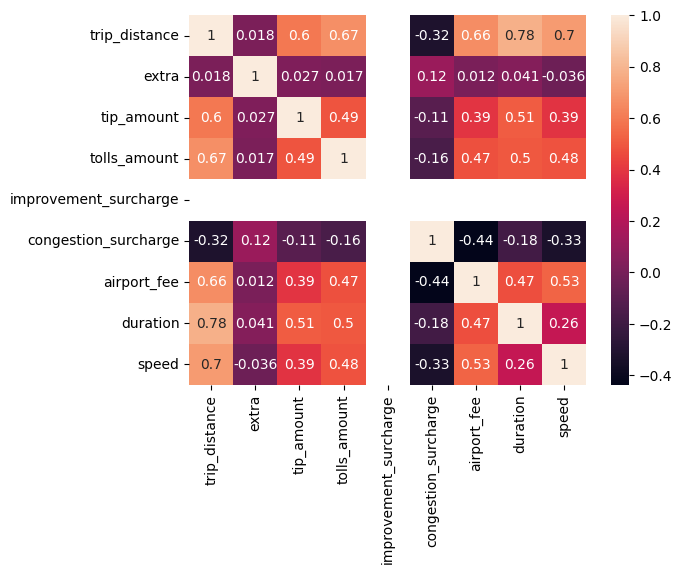

In [ ]:
sns.heatmap(X_train.corr(),annot=True)

### Statistical testing of significance of categorical variables on target variable

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
model = ols('total_amount ~ C(VendorID)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(VendorID),3.980606e+06,1.0,14684.187342,0.0
Residual,6.448400e+09,23787715.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.9168,0.0,0.9019,0.9316,True


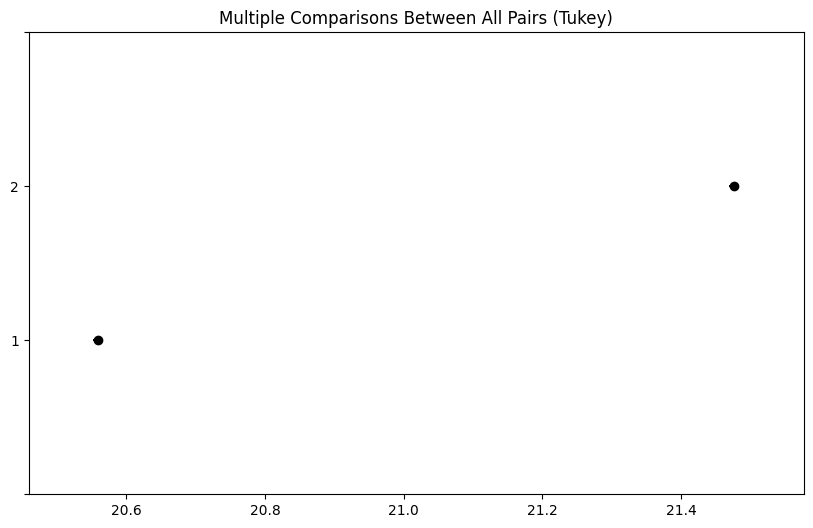

In [ ]:
tukey = pairwise_tukeyhsd(endog=X_train['total_amount'],     # Data
                          groups=X_train['VendorID'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

In [ ]:
model = ols('total_amount ~ C(pickup_month)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(pickup_month),2.354036e+07,11.0,7918.453531,0.0
Residual,6.428840e+09,23787705.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.4913,0.0,0.4326,0.55,True
1,3,1.5361,0.0,1.4798,1.5923,True
1,4,2.065,0.0,2.0087,2.1213,True
1,5,2.8934,0.0,2.8369,2.9498,True
1,6,2.7421,0.0,2.6855,2.7987,True
1,7,2.3689,0.0,2.311,2.4268,True
1,8,2.5197,0.0,2.4617,2.5776,True
1,9,3.494,0.0,3.4361,3.5519,True
1,10,3.1413,0.0,3.0851,3.1975,True
1,11,2.9407,0.0,2.8831,2.9983,True


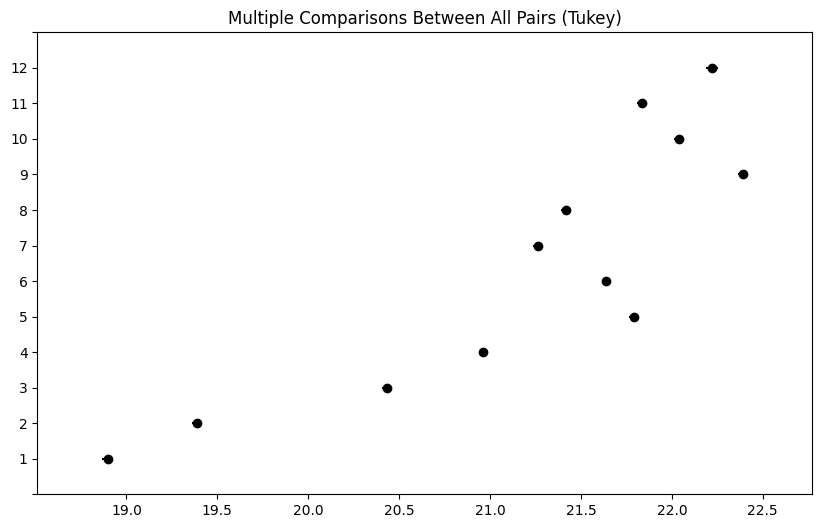

In [ ]:
tukey = pairwise_tukeyhsd(endog=X_train['total_amount'],     # Data
                          groups=X_train['pickup_month'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

In [ ]:
model = ols('total_amount ~ C(dropoff_month)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dropoff_month),2.358397e+07,11.0,7933.176965,0.0
Residual,6.428797e+09,23787705.0,NaN,NaN


In [ ]:
model = ols('total_amount ~ C(passenger_count)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(passenger_count),2.269370e+07,5.0,16791.833799,0.0
Residual,6.429687e+09,23787711.0,NaN,NaN


In [ ]:
model = ols('total_amount ~ C(RatecodeID)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(RatecodeID),3.298808e+09,6.0,4.147205e+06,0.0
Residual,3.153573e+09,23787710.0,NaN,NaN


In [ ]:
model = ols('total_amount ~ C(store_and_fwd_flag)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(store_and_fwd_flag),6.841989e+05,1.0,2522.674253,0.0
Residual,6.451696e+09,23787715.0,NaN,NaN


In [ ]:
model = ols('total_amount ~ C(PULocationID)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

In [ ]:
model = ols('total_amount ~ C(payment_type)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(payment_type),5.459250e+07,4.0,50745.294625,0.0
Residual,6.397788e+09,23787712.0,NaN,NaN


In [ ]:
model = ols('total_amount ~ C(pickup_day)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(pickup_day),5.222676e+06,6.0,3211.634672,0.0
Residual,6.447158e+09,23787710.0,NaN,NaN


In [ ]:
model = ols('total_amount ~ C(pickup_hour)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(pickup_hour),3.024342e+07,23.0,4870.525146,0.0
Residual,6.422137e+09,23787693.0,NaN,NaN


In [ ]:
model = ols('total_amount ~ C(time_of_day_pickup)', data=X_train).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(time_of_day_pickup),4.459338e+06,3.0,5483.806001,0.0
Residual,6.447921e+09,23787713.0,NaN,NaN


* From the ANOVA statistical test it turns out all the columns are statistically 
significant for the target variable, as each group has different effect on the target variable.

### Data Transformation for train data

<Axes: xlabel='trip_distance', ylabel='Count'>

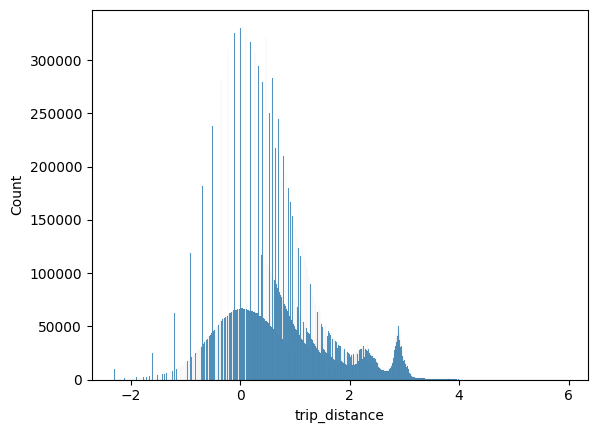

In [ ]:
sns.histplot(np.log(X_train['trip_distance']))

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [ ]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X_train[['trip_distance']])

<Axes: ylabel='Count'>

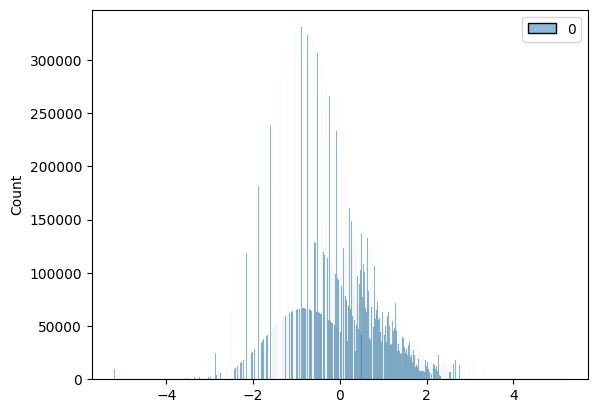

In [ ]:
sns.histplot(X_trans)

In [ ]:
X_train[X_train['trip_distance']>300]['trip_distance']

index
16386484    380.25
16310280    369.00
Name: trip_distance, dtype: float16

In [ ]:
np.array(X_train['trip_distance']).reshape(1,-1)

array([[1.19, 1.9 , 2.21, ..., 5.45, 0.8 , 4.36]], dtype=float16)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
X_trans_minmax = min_max.fit_transform(X_train[['trip_distance']])

<Axes: ylabel='Count'>

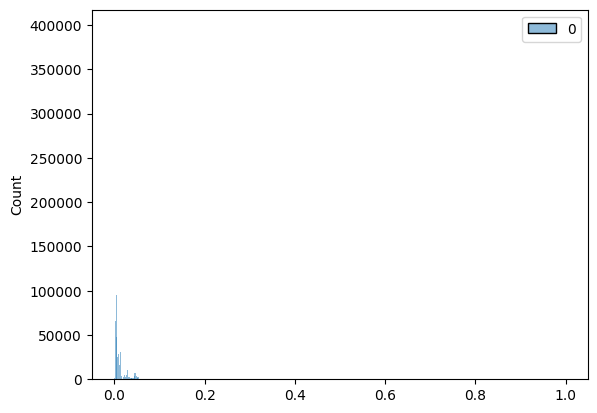

In [ ]:
sns.histplot(X_trans_minmax)

In [ ]:
min(X_trans_minmax), max(X_trans_minmax)

(array([0.], dtype=float16), array([0.9995], dtype=float16))

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
X_trans_std = std_scalar.fit_transform(X_train[['trip_distance']])

<Axes: ylabel='Count'>

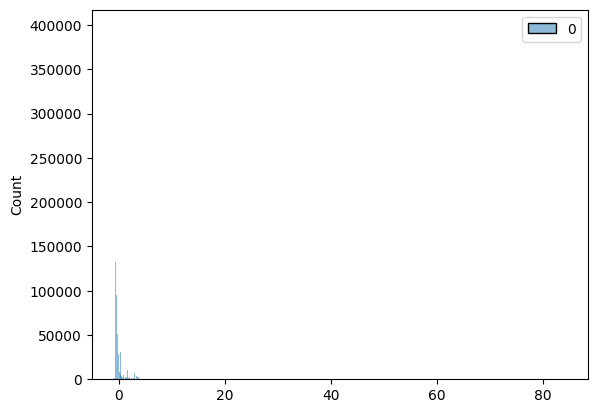

In [ ]:
sns.histplot(X_trans_std)

* Out of all the tested transformations min_max scaler seemes to be better suited for the data set.

In [ ]:
min(X_trans_std)

array([-0.767], dtype=float16)

In [ ]:
max(X_trans_std)

array([84.2], dtype=float16)

In [ ]:
X_train.select_dtypes(include=['float16'])

,trip_distance,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,duration,speed
index,,,,,,,,,
8640286,1.190430,0.5,1.860352,0.0,0.300049,2.5,0.00,274.0,15.632812
6702471,1.900391,2.5,0.000000,0.0,0.300049,2.5,0.00,1018.0,6.718750
29499879,2.210938,0.5,2.000000,0.0,0.300049,2.5,0.00,542.0,14.679688
19600442,0.199951,0.0,2.000000,0.0,0.300049,0.0,0.00,199.0,3.617188
1843144,0.520020,0.5,1.200195,0.0,0.300049,2.5,0.00,243.0,7.703125
...,...,...,...,...,...,...,...,...,...
11084523,1.400391,2.5,2.000000,0.0,0.300049,2.5,0.00,637.0,7.910156
19007821,3.949219,0.5,1.000000,0.0,0.300049,2.5,0.00,934.0,15.226562
704758,5.449219,0.0,4.511719,0.0,0.300049,0.0,1.25,1382.0,14.195312


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23787717 entries, 8640286 to 20336142
Data columns (total 26 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   VendorID               category
 1   passenger_count        category
 2   trip_distance          float16 
 3   RatecodeID             category
 4   store_and_fwd_flag     category
 5   PULocationID           category
 6   DOLocationID           category
 7   payment_type           category
 8   extra                  float16 
 9   tip_amount             float16 
 10  tolls_amount           float16 
 11  improvement_surcharge  float16 
 12  congestion_surcharge   float16 
 13  airport_fee            float16 
 14  pickup_day             category
 15  dropoff_day            category
 16  pickup_hour            category
 17  dropoff_hour           category
 18  pickup_month           category
 19  dropoff_month          category
 20  pickup_mday            category
 21  dropoff_mday           

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train.drop(['improvement_surcharge'],axis=1,inplace=True) # Dropping this columns as all the rows have same values.

In [ ]:
# getting column names belonging to each datatype
numerical_ix = X_train.select_dtypes(include=['float16']).columns
categorical_ix = X_train.select_dtypes(include=['category']).columns

In [ ]:
list(categorical_ix)

['VendorID',
 'passenger_count',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'pickup_day',
 'dropoff_day',
 'pickup_hour',
 'dropoff_hour',
 'pickup_month',
 'dropoff_month',
 'pickup_mday',
 'dropoff_mday',
 'time_of_day_pickup',
 'time_of_day_dropoff']

In [ ]:
# Building a column transformer to automate the process of the process of transformation of columns of different data types
t = [('cat', OneHotEncoder(), list(categorical_ix)), ('num', MinMaxScaler(), list(numerical_ix))]
col_transform = ColumnTransformer(transformers=t)

In [ ]:
# Fitting the tranformer on train data
col_transform.fit(X_train)

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['VendorID', 'passenger_count', 'RatecodeID',
                                  'store_and_fwd_flag', 'PULocationID',
                                  'DOLocationID', 'payment_type', 'pickup_day',
                                  'dropoff_day', 'pickup_hour', 'dropoff_hour',
                                  'pickup_month', 'dropoff_month',
                                  'pickup_mday', 'dropoff_mday',
                                  'time_of_day_pickup',
                                  'time_of_day_dropoff']),
                                ('num', MinMaxScaler(),
                                 ['trip_distance', 'extra', 'tip_amount',
                                  'tolls_amount', 'congestion_surcharge',
                                  'airport_fee', 'duration', 'speed'])])

In [ ]:
import joblib

In [ ]:
joblib.dump(col_transform,'col_transform.pkl') # Saving the fitted column tranformer as a pickle file to use for further transformations

['col_transform.pkl']

In [ ]:
col_transform = joblib.load('/content/col_transform.pkl')

In [ ]:
train_X = col_transform.transform(X_train) # transforming the training data

In [ ]:
train_X.shape

(23787717, 710)

In [ ]:
train_X

<23787717x710 sparse matrix of type '<class 'numpy.float64'>'
	with 534192448 stored elements in Compressed Sparse Row format>

### Building a Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [ ]:
def scores(y_test,y_pred):
  print('r2_score: ',r2_score(y_test,y_pred))
  print('mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
  print('mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
  print('mean_absolute_percentage_error: ',mean_absolute_percentage_error(y_test,y_pred))

In [ ]:
lr = LinearRegression()
lr.fit(train_X,y_train)
y_pred = lr.predict(train_X)
scores(y_train,y_pred)

r2_score:  0.9690370883860533
mean_absolute_error:  1.03915959578749
mean_squared_error:  2.898040932881876
mean_absolute_percentage_error:  0.05149452454174673


In [ ]:
X_test = pd.read_parquet('/content/drive/MyDrive/X_test.parquet.gzip')
conv_catg(X_test)
X_test = reduce_memory_usage(X_test)
y_test = pd.read_parquet('/content/drive/MyDrive/y_test.parquet.gzip')

Mem. usage decreased to 502.84 Mb (28.6% reduction)


In [ ]:
X_test.drop(['improvement_surcharge'],axis=1,inplace=True)

In [ ]:
test_X = col_transform.transform(X_test)

In [ ]:
y_pred = lr.predict(test_X)
scores(y_test,y_pred)

r2_score:  0.9695919380987292
mean_absolute_error:  1.038519183284114
mean_squared_error:  2.871868310605684
mean_absolute_percentage_error:  0.05200907878426217


### Building a catboost regressor model

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
model = CatBoostRegressor()
model.fit(train_X, y_train, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
y_pred = model.predict(train_X)
scores(y_train,y_pred)

r2_score:  0.9881663339022224
mean_absolute_error:  0.43057874344818986
mean_squared_error:  1.7916091601430824
mean_absolute_percentage_error:  0.021414532084400348


In [ ]:
y_pred = catboost_model.predict(test_X)
scores(y_test,y_pred)

r2_score:  0.9859112515887144
mean_absolute_error:  0.43393371455965407
mean_squared_error:  1.954818129064982
mean_absolute_percentage_error:  0.02198162680934571


* Catboost model performance is better than the linear regression model

In [ ]:
import pickle

In [ ]:
# saving the catboost model for future predictions
with open('catboost_base_model.pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
with open('/content/catboost_base_model.pkl', 'rb') as f:
    catboost_model = pickle.load(f)